In [ ]:
Aim : perform pca 

In [20]:
import pandas as pd
import numpy as np 
import sympy as sp 
import matplotlib.pyplot as plt
import math
import statistics

In [21]:
df=np.array([[2.4,2.4],[0.3,0.5],[2.3,3.4],[0.4,1.4],[2.0,2.1],[2.1,1.7],[2.5,1.3],[2.1,2.2],[1.2,3.0]])

In [22]:
df

array([[2.4, 2.4],
       [0.3, 0.5],
       [2.3, 3.4],
       [0.4, 1.4],
       [2. , 2.1],
       [2.1, 1.7],
       [2.5, 1.3],
       [2.1, 2.2],
       [1.2, 3. ]])

In [25]:
df=pd.DataFrame(df,columns=['X','Y'])

In [26]:
df.describe()


,X,Y
count,9.000000,9.000000
mean,1.700000,2.000000
std,0.851469,0.891628
min,0.300000,0.500000
25%,1.200000,1.400000
50%,2.100000,2.100000
75%,2.300000,2.400000
max,2.500000,3.400000


In [35]:
X_values_array=df["X"].values
print(type(X_values_array))
Y_values_array=df["Y"].values


<class 'numpy.ndarray'>


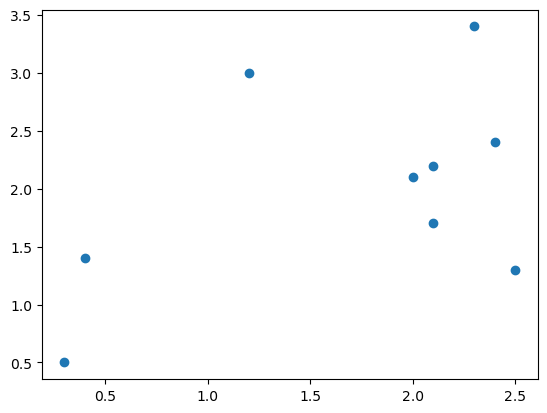

In [36]:
plt.scatter(X_values_array, Y_values_array)
plt.show()

In [38]:
df.cov()   # covariance matrix

,X,Y
X,0.72500,0.36625
Y,0.36625,0.79500


In [39]:
np.linalg.eig(df.cov())

EigResult(eigenvalues=array([0.39208145, 1.12791855]), eigenvectors=array([[-0.73997627, -0.67263298],
       [ 0.67263298, -0.73997627]]))

In [41]:
eigenvalues, eigenvectors=np.linalg.eig(df.cov())

In [45]:
eigenvalues

array([0.39208145, 1.12791855])

In [43]:
eigenvectors[0]

array([-0.73997627, -0.67263298])

In [44]:
V = eigenvectors
print(V[:,0])

[-0.73997627  0.67263298]


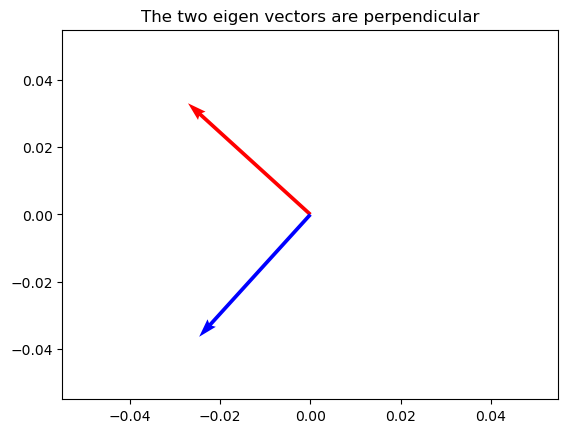

In [46]:
V = eigenvectors
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.quiver(*origin, V[0], V[1], color=['r','b'], scale=3)
plt.title("The two eigen vectors are perpendicular")
plt.show()


In [49]:
x_bar=statistics.mean(df["X"].values)

In [50]:
y_bar=statistics.mean(df["Y"].values)

[[-0.73997627 -0.67263298]
 [ 0.67263298 -0.73997627]]


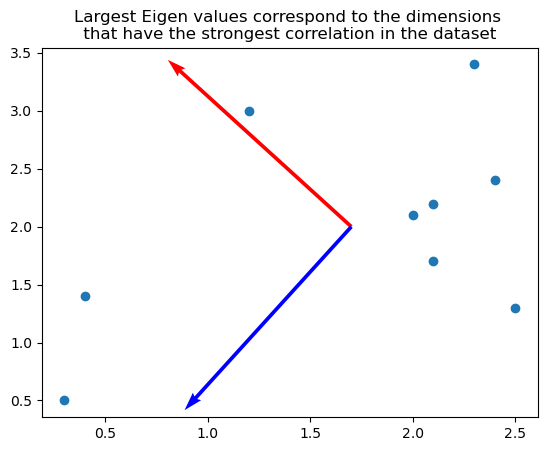

In [56]:
plt.scatter(X_values_array, Y_values_array)
V = eigenvectors
print(V)
origin = np.array([[x_bar, x_bar],[y_bar, y_bar]]) # origin point

plt.quiver(*origin, V[0], V[1], color=['r','b'], scale=2)
plt.title("Largest Eigen values correspond to the dimensions \n that have the strongest correlation in the dataset ")
plt.show()

In [53]:
eigenvalues

array([0.39208145, 1.12791855])

In [54]:
lambda_max,lambda_min= max(eigenvalues),min(eigenvalues)

In [58]:
lambda_max


1.1279185541665437

In [57]:
lambda_min

0.39208144583345633

In [60]:
lambda_max_index = np.argmax(eigenvalues)
lambda_min_index = np.argmin(eigenvalues)


In [61]:
print(lambda_max_index ,lambda_min_index)

1 0


In [63]:
x_dev=[ele-x_bar for ele in X_values_array]

In [65]:
x_dev

[0.7,
 -1.4,
 0.5999999999999999,
 -1.2999999999999998,
 0.30000000000000004,
 0.40000000000000013,
 0.8,
 0.40000000000000013,
 -0.5]

In [68]:
y_dev=[ele-y_bar for ele in Y_values_array]

In [69]:
y_dev

[0.3999999999999999,
 -1.5,
 1.4,
 -0.6000000000000001,
 0.10000000000000009,
 -0.30000000000000004,
 -0.7,
 0.20000000000000018,
 1.0]

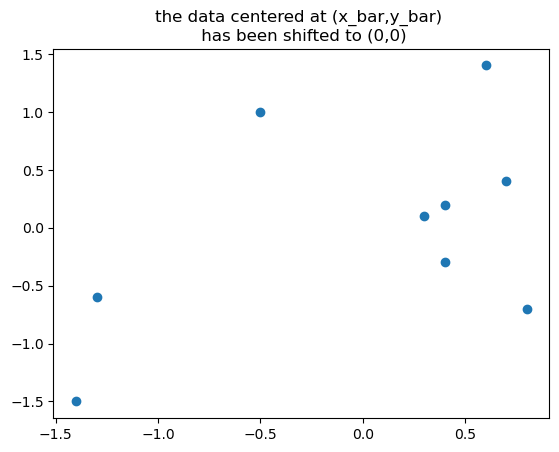

In [70]:
plt.scatter(x_dev, y_dev)
plt.title("the data centered at (x_bar,y_bar) \n has been shifted to (0,0)")
plt.show()


In [71]:
np.column_stack((x_dev, y_dev))

array([[ 0.7,  0.4],
       [-1.4, -1.5],
       [ 0.6,  1.4],
       [-1.3, -0.6],
       [ 0.3,  0.1],
       [ 0.4, -0.3],
       [ 0.8, -0.7],
       [ 0.4,  0.2],
       [-0.5,  1. ]])

In [72]:
vector1 = eigenvectors[:,1]
vector2 = np.array([1,0])

unit_vector1 = vector1 / np.linalg.norm(vector1)
unit_vector2 = vector2 / np.linalg.norm(vector2)

dot_product = np.dot(unit_vector1, unit_vector2)

angle = -np.arccos(dot_product) #radians
print(angle)
angle_degree=angle*180/math.pi



-2.3085575804956946


In [76]:
angle=angle+ math.pi
angle_degree=angle*180/math.pi
print(angle_degree)
print(angle)


227.72939387466386
3.9746277266838916


In [77]:

R=[[math.cos(angle),math.sin(angle)],[-math.sin(angle),math.cos(angle)]]

In [78]:
Rotation_matrix=np.array(R)

In [79]:
Rotation_matrix

array([[-0.67263298, -0.73997627],
       [ 0.73997627, -0.67263298]])

In [80]:
data=[x_dev,y_dev]

In [81]:
data_array=np.array(data)

In [82]:
transformed_data=Rotation_matrix @ data_array

In [83]:
transformed_data

array([[-0.76683359,  2.05165057, -1.43954656,  1.31840863, -0.27578752,
        -0.04706031, -0.020123  , -0.41704845, -0.40365978],
       [ 0.24893019, -0.0270173 , -0.49770041, -0.55838936,  0.15472958,
         0.4977804 ,  1.0628241 ,  0.16146391, -1.04262111]])

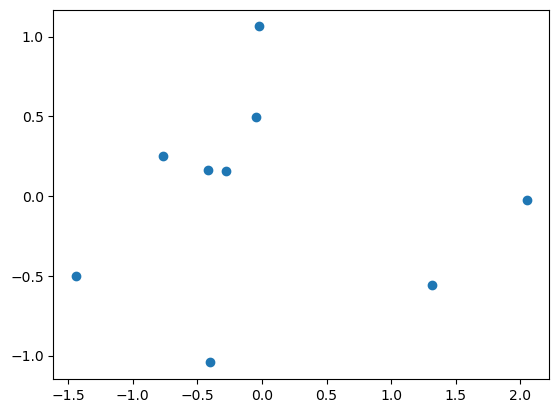

In [85]:

plt.scatter(transformed_data[0], transformed_data[1])
plt.show()

In [86]:
v=eigenvectors
print("EigenVectors: ",v)

EigenVectors:  [[-0.73997627 -0.67263298]
 [ 0.67263298 -0.73997627]]


In [87]:
w=eigenvalues
print("EigenValues: ",w)

EigenValues:  [0.39208145 1.12791855]
